# Series Temporais: Fundamentos

Uma serie temporal é definida como uma sequência de observações de uma variável ao longo do tempo. A análise de séries temporais é uma técnica estatística que lida com dados que são ordenados no tempo. A análise de séries temporais é amplamente utilizada para prever eventos futuros com base em eventos passados. Matmatuicamente podemos definir uma série temporal como:

$$X_t = f(X_{t-1}, X_{t-2}, ..., X_{t-n}) + \epsilon_t$$

onde:

- $X_t$ é o valor da série temporal no instante de tempo $t$.
- $f$ é uma função que descreve a relação entre os valores passados e presentes.
- $\epsilon_t$ é o erro aleatório no instante de tempo $t$.


Uma series temporal pode ser decomposta em quatro componentes principais:

- **Tendência**: A direção geral em que os dados estão se movendo.
- **Sazonalidade**: Padrões que se repetem em intervalos regulares.
- **Ciclo**: Padrões que se repetem em intervalos irregulares.
- **Ruído**: Flutuações aleatórias que não podem ser modeladas.

<img src='https://149695847.v2.pressablecdn.com/wp-content/uploads/2021/08/image-255.png'>



A decomposição de uma série temporal é importante para entender o comportamento dos dados e para modelar a série temporal. A decomposição pode ser feita de duas maneiras:

- **Aditiva**: A série temporal é modelada como a soma dos componentes.
- **Multiplicativa**: A série temporal é modelada como o produto dos componentes.

A forma aditiva é dada por:

$$X_t = T_t + S_t + C_t + \epsilon_t$$

onde:

- $T_t$ é a tendência.
- $S_t$ é a sazonalidade.
- $C_t$ é o ciclo.
- $\epsilon_t$ é o erro aleatório.

A forma multiplicativa é dada por:

$$X_t = T_t \times S_t \times C_t \times \epsilon_t$$

A decomposição aditiva é usada quando a magnitude da variação dos dados é constante ao longo do tempo. A decomposição multiplicativa é usada quando a magnitude da variação dos dados aumenta ou diminui ao longo do tempo. Em geral, no mundo real, os dados podem ter as duas formas de decomposição. Eles podem ter trend positivo em uma parte e negativo em outra parte. Portanto, é importante analisar os dados e decidir qual forma de decomposição é apropriada.



Uma serie temporal pode ter dependência temporal, ou seja, o valor de $X_t$ depende dos valores anteriores. A dependência temporal pode ser de dois tipos:

- **Autoregressiva (AR)**: O valor de $X_t$ depende dos valores passados.
- **Média Móvel (MA)**: O valor de $X_t$ depende dos erros passados.

A combinação de AR e MA é chamada de **Modelo ARMA**. Vamos ver essa combinação em detalhes mais adiante.





## Baseline

### Baseline em Séries Temporais

A baseline em séries temporais é o valor que você espera para a série se não tiver nenhuma informação adicional. Serve como um ponto de comparação para avaliar a eficácia de modelos preditivos. Em termos simples, se um modelo de previsão não consegue superar a baseline, ele provavelmente não está capturando padrões significativos na série, e, portanto, não é útil.

A baseline fornece uma referência clara para avaliar a capacidade preditiva de um modelo, destacando sua relevância ao evidenciar se o modelo está realmente aprendendo com os dados ou apenas replicando padrões triviais. Ela pode ser determinada de diversas formas, cada uma oferecendo uma perspectiva ligeiramente diferente do comportamento "esperado" da série temporal.

#### Métodos Comuns para Calcular a Baseline:

1. **Média Simples**: A média aritmética de todos os valores observados até o momento. Assume-se que o melhor palpite para o próximo valor é a média de todos os valores passados. Embora seja um método simples, ele pode ser útil em séries estacionárias.
   
   $$
   \text{Média} = \frac{1}{n} \sum_{i=1}^{n} x_i
   $$
   
2. **Média Móvel**: A média de um subconjunto de valores da série temporal, calculada em uma janela de tempo fixa. Ela suaviza variações de curto prazo e destaca tendências de longo prazo.

   $$
   \text{Média Móvel} = \frac{1}{N} \sum_{i=n-N+1}^{n} x_i
   $$
   Onde $N$ é o tamanho da janela.

3. **Último Valor**: Simplesmente prevê que o próximo valor será igual ao último valor observado na série. Esse método é útil quando a série exibe uma grande inércia ou segue um comportamento semelhante a um processo de caminhada aleatória.

   $$
   \text{Previsão} = x_n
   $$

4. **Média Ponderada**: A média dos valores da série com diferentes pesos atribuídos a cada valor. Esse método é útil quando valores mais recentes devem ter maior influência nas previsões.

   $$
   \text{Média Ponderada} = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i}
   $$
   Onde $w_i$ é o peso atribuído ao $i$-ésimo valor.

5. **Média Exponencial**: Um caso especial da média ponderada onde os pesos decrescem exponencialmente à medida que os dados ficam mais antigos. A média móvel exponencialmente ponderada (EWMA) dá mais importância aos valores mais recentes.

   $$
   \text{EWMA}_t = \alpha x_t + (1 - \alpha) \text{EWMA}_{t-1}
   $$
   Onde $ \alpha $ é o fator de suavização entre 0 e 1.

### Importância da Baseline

A baseline desempenha um papel crucial na avaliação de modelos de séries temporais, pois serve como referência mínima de desempenho. Quando um modelo é treinado, ele deve ser avaliado em comparação à baseline. Caso o modelo não supere a baseline, ele pode estar ajustando-se excessivamente aos ruídos ou não estar capturando padrões relevantes.

Ao construir modelos mais sofisticados, como modelos ARIMA, LSTM ou de redes neurais, é comum começar com uma baseline simples e, em seguida, verificar se as técnicas mais avançadas oferecem um ganho significativo de precisão. Caso contrário, a complexidade adicional não se justifica.


## Exemplo 1


Agora vamos utilizar como exemplo os dados de fechamento diário de uma ação do mercado financeiro, empressa Apple para construir as baselines.

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Baixando os dados financeiros (exemplo: Apple)
ticker = "AAPL"
data = yf.download(ticker, start="2022-01-01", end="2023-01-01")

# Selecionando a série temporal do preço de fechamento ajustado
serie_temporal = data['Adj Close']

# 1. Baseline da Média Simples
media_simples = serie_temporal.mean()

# 2. Baseline da Média Móvel (usando janela de 5 períodos)
media_movel = serie_temporal.rolling(window=5).mean().iloc[-1]

# 3. Baseline do Último Valor
ultimo_valor = serie_temporal.iloc[-1]

# 4. Baseline da Média Ponderada (peso decrescente para valores mais antigos)
pesos = np.arange(1, len(serie_temporal)+1)
media_ponderada = np.average(serie_temporal, weights=pesos)

# 5. Baseline da Média Exponencial (usando alpha = 0.3)
media_exponencial = serie_temporal.ewm(alpha=0.3).mean().iloc[-1]

# Exibindo as baselines calculadas
print(f"Ticker: {ticker}")
print(f"Média Simples: {media_simples:.2f}")
print(f"Média Móvel (últimos 5 valores): {media_movel:.2f}")
print(f"Último Valor: {ultimo_valor:.2f}")
print(f"Média Ponderada: {media_ponderada:.2f}")
print(f"Média Exponencial: {media_exponencial:.2f}")

[*********************100%***********************]  1 of 1 completed

Ticker: AAPL
Média Simples: 152.94
Média Móvel (últimos 5 valores): 128.29
Último Valor: 128.72
Média Ponderada: 148.25
Média Exponencial: 129.03


Quando trabalhamos com dados financeiros reais, as baselines fornecem uma boa ideia de como os modelos mais simples se comportariam. Por exemplo, para prever o próximo preço de fechamento de uma ação, se nosso modelo mais sofisticado não superar a baseline (como a média móvel ou o último valor), então o modelo pode não estar capturando a dinâmica do mercado adequadamente.


## Exemplo 2

Como outro exemplo vamos construir uns modelos de baseline para prever a produção de leite em uma fazenda de gado leiteiro.

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production (pounds per cow)
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [8]:
df.columns = ['Month', 'Milk']

df.head()

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


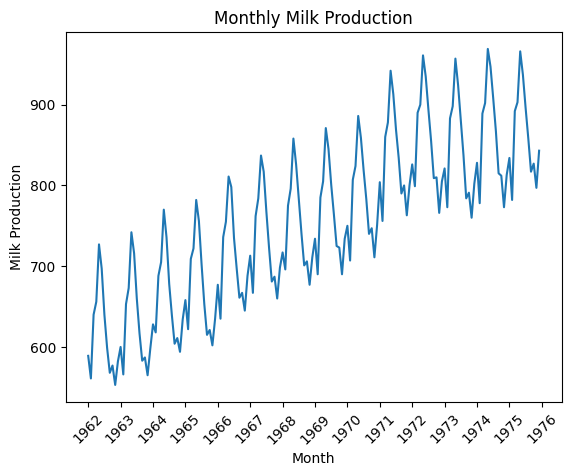

In [12]:
plt.plot(df['Month'], df['Milk'])
plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Milk Production')
plt.title('Monthly Milk Production')
plt.show()

Separando a região de test 

In [17]:
train = df[:-12]
test = df[-12:]

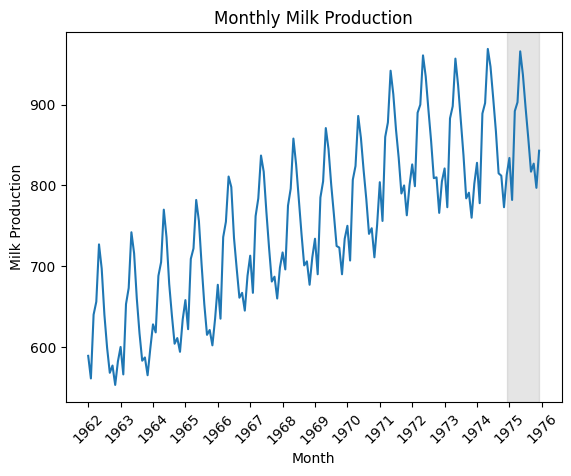

In [14]:
plt.plot(df['Month'], df['Milk'])
plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
plt.xticks(rotation=45)
plt.axvspan(155, 167, color='#808080', alpha=0.2)
plt.xlabel('Month')
plt.ylabel('Milk Production')
plt.title('Monthly Milk Production')
plt.show()

### Baseline 1: Media

In [18]:
pred_df = test.copy()

pred_df['mean'] = np.mean(train['Milk'])

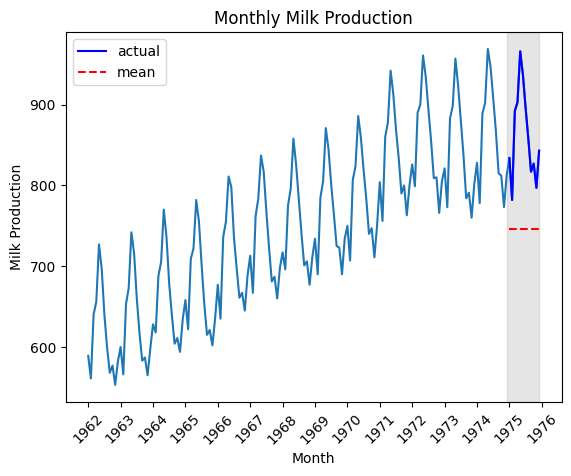

In [19]:
plt.plot(df['Month'], df['Milk'])
plt.plot(pred_df['Month'], pred_df['Milk'], 'b-', label='actual')
plt.plot(pred_df['mean'], 'r--', label='mean')
plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
plt.xticks(rotation=45)
plt.axvspan(155, 167, color='#808080', alpha=0.2)
plt.xlabel('Month')
plt.ylabel('Milk Production')
plt.legend()
plt.title('Monthly Milk Production')
plt.show()

### Baseline 2: Media do ultimo ano

In [20]:
pred_df['mean_last_year'] = np.mean(train['Milk'][-12:])

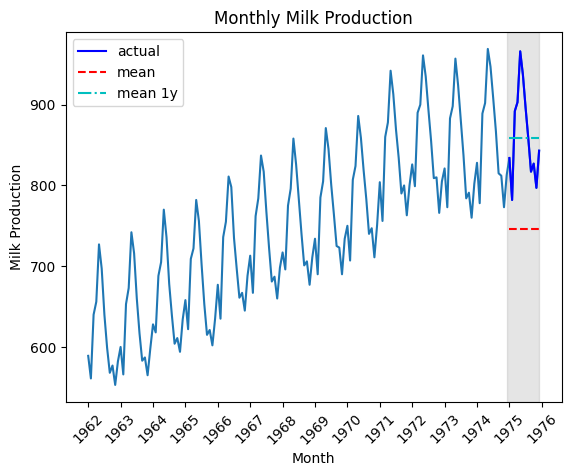

In [21]:
plt.plot(df['Month'], df['Milk'])
plt.plot(pred_df['Month'], pred_df['Milk'], 'b-', label='actual')
plt.plot(pred_df['mean'], 'r--', label='mean')
plt.plot(pred_df['mean_last_year'], 'c-.', label='mean 1y')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
plt.xticks(rotation=45)
plt.axvspan(155, 167, color='#808080', alpha=0.2)
plt.xlabel('Month')
plt.ylabel('Milk Production')
plt.legend()
plt.title('Monthly Milk Production')
plt.show()

### Baseline 3: Prever o ultimo valor

In [22]:
pred_df['last'] = train['Milk'].iloc[-1]

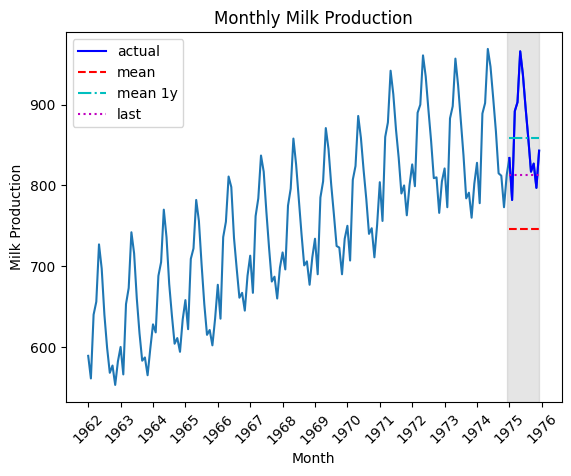

In [23]:
plt.plot(df['Month'], df['Milk'])
plt.plot(pred_df['Month'], pred_df['Milk'], 'b-', label='actual')
plt.plot(pred_df['mean'], 'r--', label='mean')
plt.plot(pred_df['mean_last_year'], 'c-.', label='mean 1y')
plt.plot(pred_df['last'], 'm:', label='last')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
plt.xticks(rotation=45)
plt.axvspan(155, 167, color='#808080', alpha=0.2)
plt.xlabel('Month')
plt.ylabel('Milk Production')
plt.legend()
plt.title('Monthly Milk Production')
plt.show()

### Baseline 4: Ultimo sessão

In [24]:
pred_df['last_season'] = train['Milk'][-12:].values

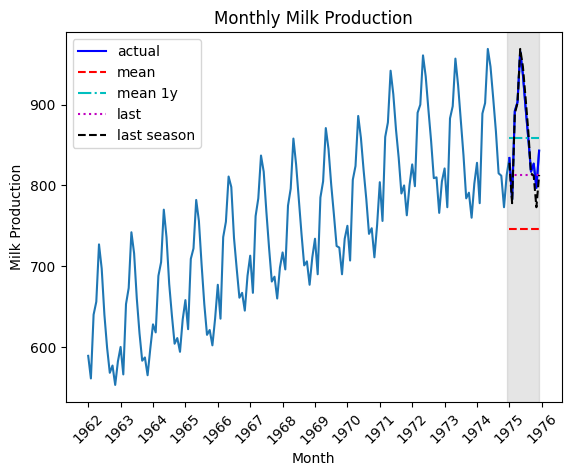

In [25]:
plt.plot(df['Month'], df['Milk'])
plt.plot(pred_df['Month'], pred_df['Milk'], 'b-', label='actual')
plt.plot(pred_df['mean'], 'r--', label='mean')
plt.plot(pred_df['mean_last_year'], 'c-.', label='mean 1y')
plt.plot(pred_df['last'], 'm:', label='last')
plt.plot(pred_df['last_season'], 'k--', label='last season')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
plt.xticks(rotation=45)
plt.axvspan(155, 167, color='#808080', alpha=0.2)
plt.xlabel('Month')
plt.ylabel('Milk Production')
plt.legend()
plt.title('Monthly Milk Production')
plt.show()

## Evaluação dos modelos

In [29]:
pred_df

,Month,Milk,mean,mean_last_year,last,last_season
156,1975-01,834,746.403846,858.416667,813,828
157,1975-02,782,746.403846,858.416667,813,778
158,1975-03,892,746.403846,858.416667,813,889
159,1975-04,903,746.403846,858.416667,813,902
160,1975-05,966,746.403846,858.416667,813,969
161,1975-06,937,746.403846,858.416667,813,947
162,1975-07,896,746.403846,858.416667,813,908
163,1975-08,858,746.403846,858.416667,813,867
164,1975-09,817,746.403846,858.416667,813,815
165,1975-10,827,746.403846,858.416667,813,812


In [26]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100,2)

In [27]:
mape_mean = mape(pred_df['Milk'], pred_df['mean'])
mape_mean_1y = mape(pred_df['Milk'], pred_df['mean_last_year'])
mape_last = mape(pred_df['Milk'], pred_df['last'])
mape_last_season = mape(pred_df['Milk'], pred_df['last_season'])

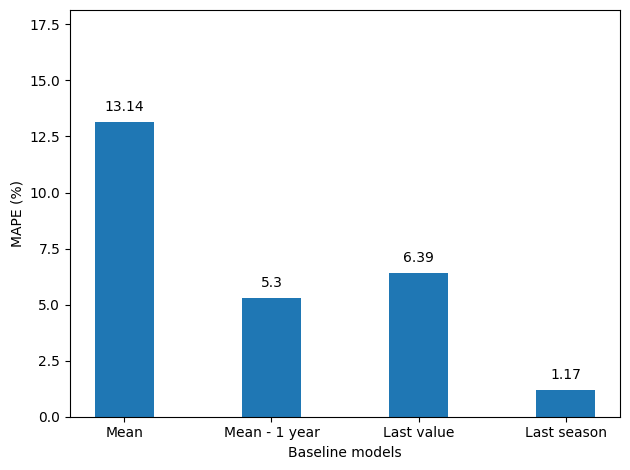

In [28]:
fig, ax = plt.subplots()

x = ['Mean', 'Mean - 1 year', 'Last value', 'Last season']
y = [mape_mean, mape_mean_1y, mape_last, mape_last_season]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baseline models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, max(y) + 5)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.5, s=str(value), ha='center')
    
plt.tight_layout()